In [64]:
import statsmodels.api as sm
import pandas as pd
from sklearn import preprocessing
df = pd.ExcelFile('dta1.xlsx').parse()

#define predictor and response variables


Correlation Matrix:
                             B1 Sales Value  B1 Sales Volume (000 Kgs)   \
B1 Sales Value                     1.000000                    0.985478   
B1 Sales Volume (000 Kgs)          0.985478                    1.000000   
B1 Number of Dealers ('000)        0.890794                    0.888696   
B1  \nWtd Val Distn (%)            0.949390                    0.948077   
B1  \nAvg Price/Litre              0.900994                    0.816300   
B1 Normalised GRP                 -0.447102                   -0.458452   
B1  abs                            0.182069                    0.148976   
Promotions                         0.188270                    0.154306   

                             B1 Number of Dealers ('000)  \
B1 Sales Value                                  0.890794   
B1 Sales Volume (000 Kgs)                       0.888696   
B1 Number of Dealers ('000)                     1.000000   
B1  \nWtd Val Distn (%)                         0.954360   
B1  

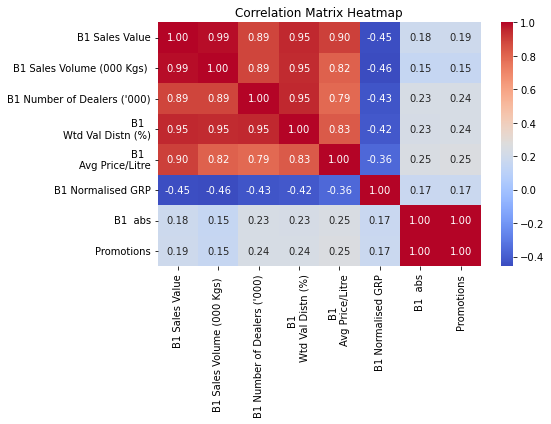

In [73]:
import seaborn as sns

correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

In [52]:
df=df[['B1 Sales Value','B1 Normalised GRP','B1  abs','Promotions']]
preprocessing.normalize(df)
y = df['B1 Sales Value']
x = df['B1 Normalised GRP']


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         B1 Sales Value   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     8.745
Date:                Sun, 15 Dec 2024   Prob (F-statistic):            0.00553
Time:                        13:30:15   Log-Likelihood:                -365.77
No. Observations:                  37   AIC:                             735.5
Df Residuals:                      35   BIC:                             738.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.192e+04   1234.79

In [53]:
x = df['B1  abs']  


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         B1 Sales Value   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.200
Date:                Sun, 15 Dec 2024   Prob (F-statistic):              0.281
Time:                        13:30:16   Log-Likelihood:                -369.27
No. Observations:                  37   AIC:                             742.5
Df Residuals:                      35   BIC:                             745.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.81e+04   1304.701     13.869      0.0

In [55]:
x = df['Promotions']  


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         B1 Sales Value   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.286
Date:                Sun, 15 Dec 2024   Prob (F-statistic):              0.264
Time:                        13:30:28   Log-Likelihood:                -369.23
No. Observations:                  37   AIC:                             742.5
Df Residuals:                      35   BIC:                             745.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.788e+04   1421.758     12.578      0.0

In [56]:
x = df[['B1 Normalised GRP','B1  abs','Promotions']]


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         B1 Sales Value   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     53.77
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           8.47e-13
Time:                        13:30:45   Log-Likelihood:                -337.10
No. Observations:                  37   AIC:                             682.2
Df Residuals:                      33   BIC:                             688.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.174e+04   6960.64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the regression model on training data

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1682108.2406126512


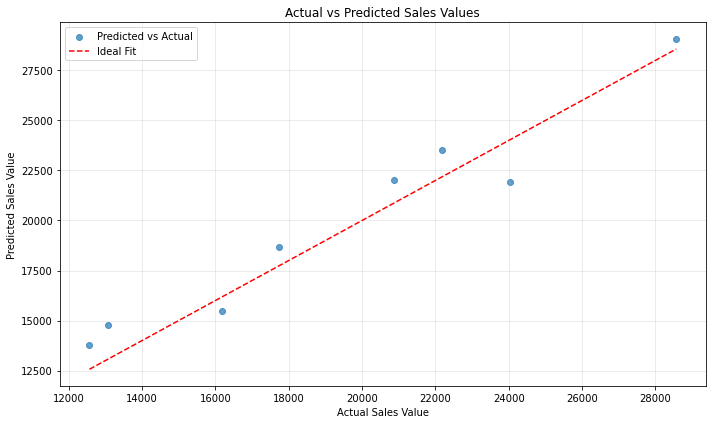

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ideal Fit")
plt.title("Actual vs Predicted Sales Values")
plt.xlabel("Actual Sales Value")
plt.ylabel("Predicted Sales Value")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()